In [1]:
#Import the standard libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [2]:
data=pd.read_csv('SampleSuperstore.csv')
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
data.shape

(9994, 13)

In [5]:
data.isna().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
data.describe().style.background_gradient(cmap='winter_r')

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
def data_process(df):
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")
    df.info()
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")
    print(df.isna().sum())
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")
    print(df.describe())
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")
    print(df.columns)
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")
    print(df.shape)
    print("----------------------------------------------------------------------------------")
    print("----------------------------------------------------------------------------------")
    

In [8]:
data_process(data)

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
-----------------

In [9]:
def heatmap_data(df):
    sns.set(rc={'figure.figsize':(16,8)})
    sns.heatmap(data.corr(),annot=True,cmap="ocean_r")

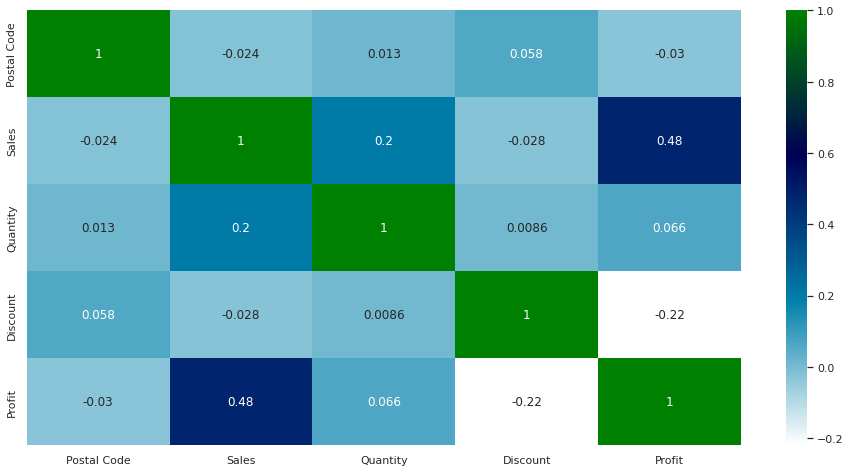

In [10]:
heatmap_data(data)

In [11]:
def data_visualization(df):
    sns.set(rc={'figure.figsize':(16,8)})
    #sns.countplot(df,palette='rainbow')
    sns.barplot(df,x=df.values,y=df.index)
    

/home/vinod/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


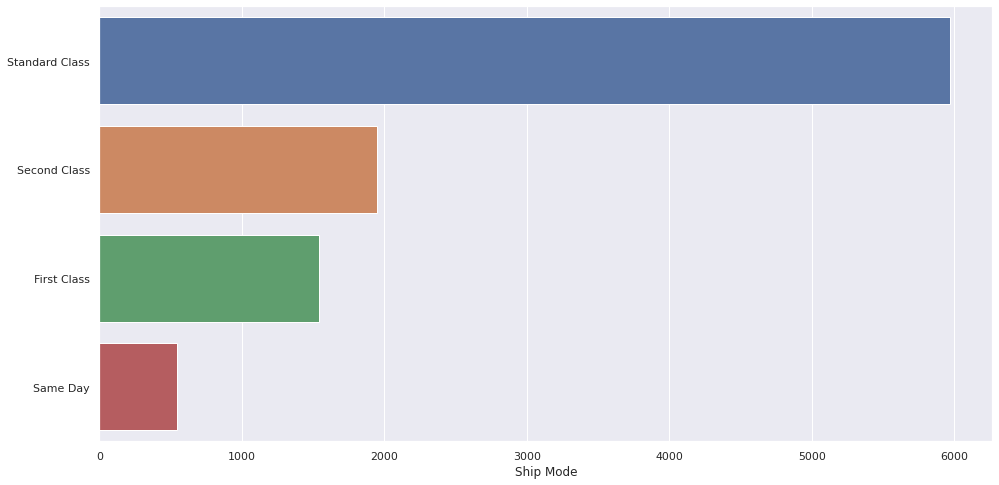

In [12]:
data_visualization(data['Ship Mode'].value_counts())

<AxesSubplot:>

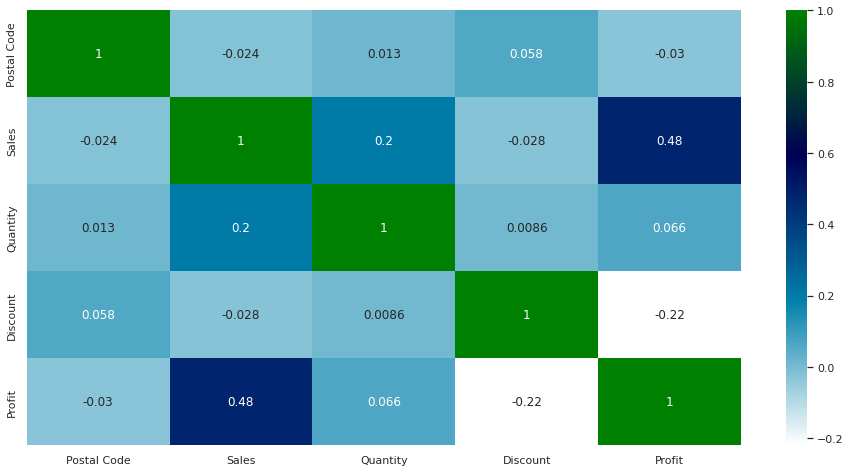

In [13]:
sns.set(rc={'figure.figsize':(16,8)})
sns.heatmap(data.corr(),annot=True,cmap="ocean_r")

# Explore Data Analysis

In [14]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

/home/vinod/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

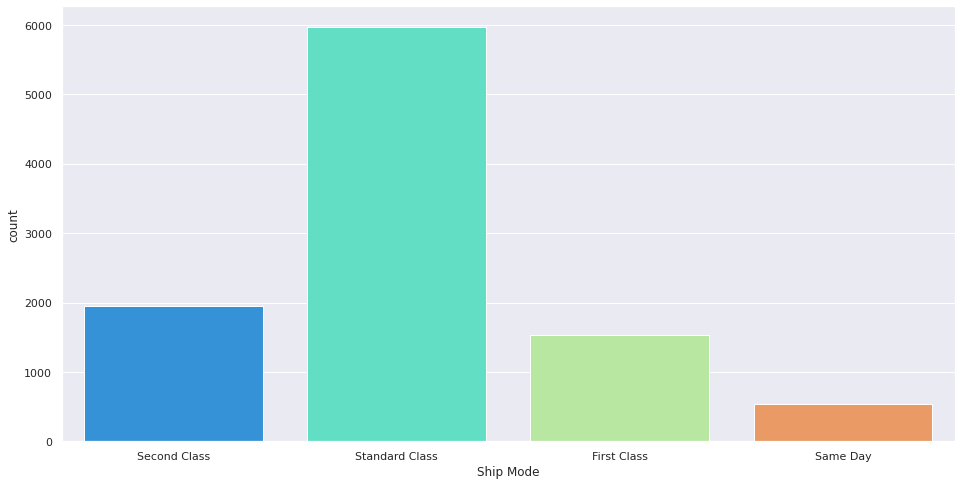

In [15]:
#To visualize the ship Mode in the dataset

sns.countplot(data['Ship Mode'],palette='rainbow')

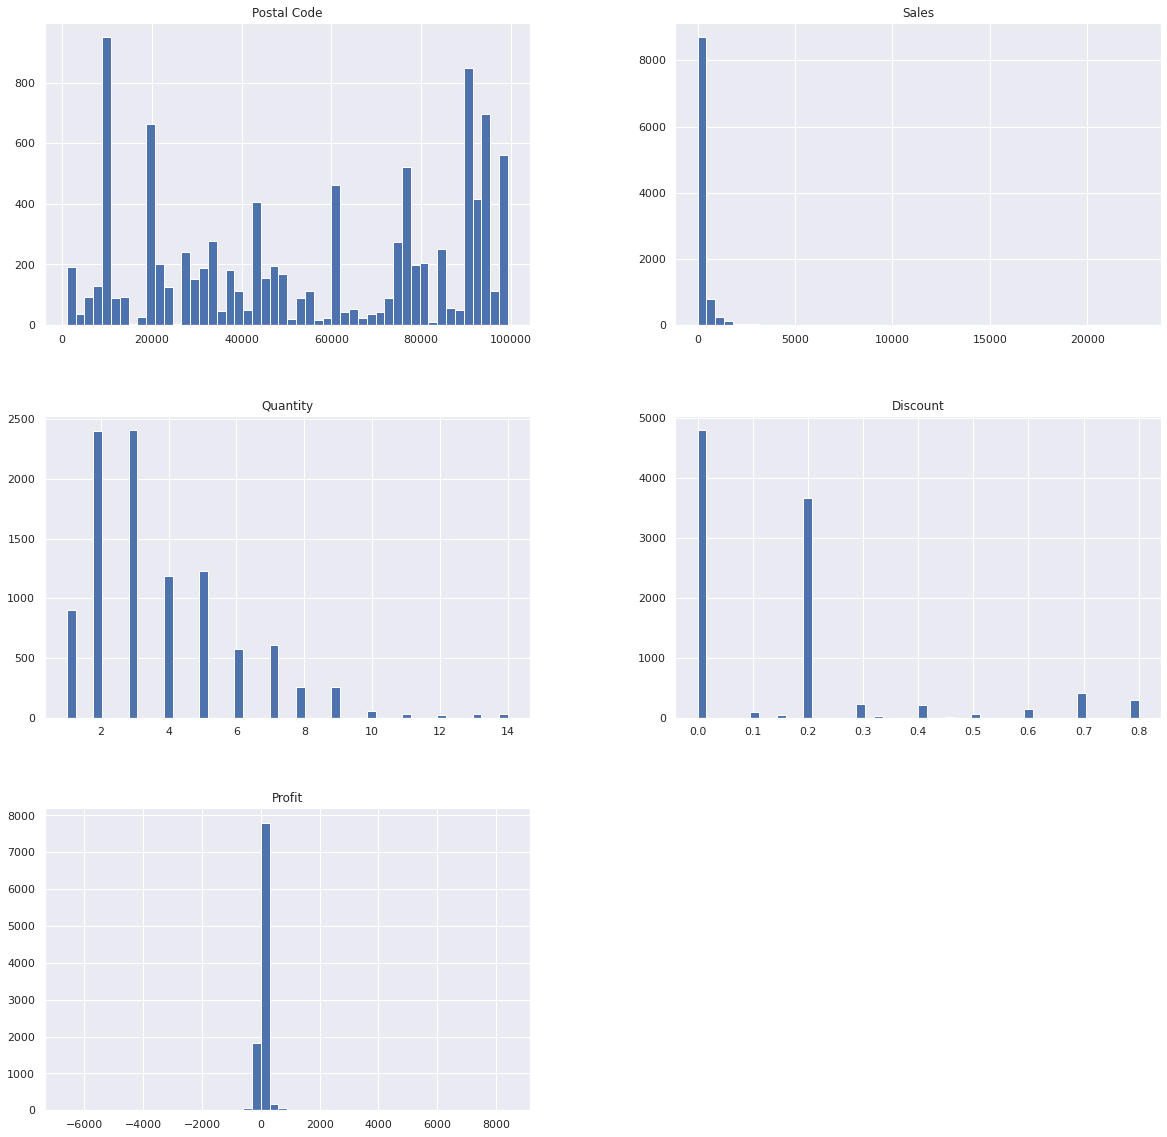

In [16]:
#To visualize the ship Mode in the dataset
data.hist(bins=50,figsize=(20,20))
plt.show()

array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

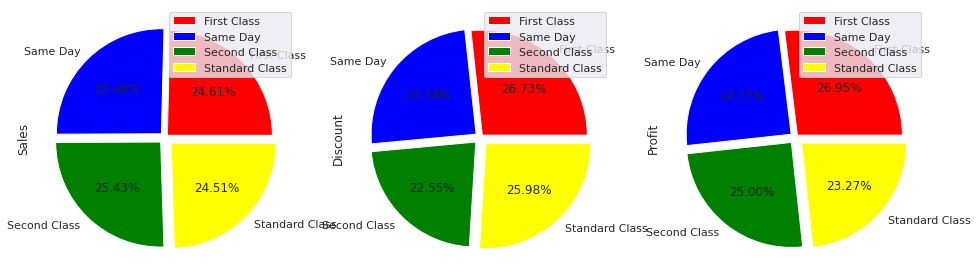

In [17]:
df_shipment=data.groupby(['Ship Mode'])[['Sales', 'Discount','Profit']].mean()
df_shipment.plot.pie(subplots=True,autopct="%1.2f%%",label=df_shipment.index,figsize=(16,5),explode=[0.03,0.05,0.06,0.08],colors=['red','blue','green','yellow'])

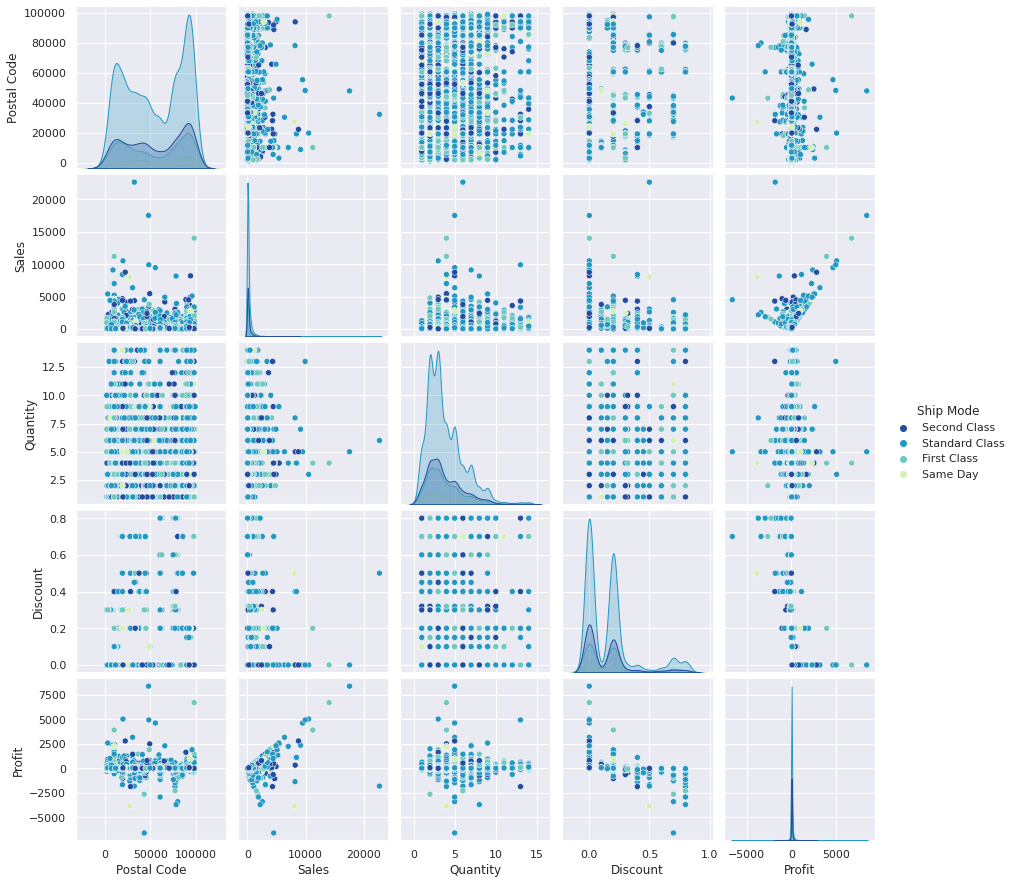

In [18]:
sns.set(rc={'figure.figsize':(13,8)})
sns.pairplot(data,palette='YlGnBu_r',hue='Ship Mode')

array([<AxesSubplot:ylabel='Sales'>, <AxesSubplot:ylabel='Discount'>,
       <AxesSubplot:ylabel='Profit'>], dtype=object)

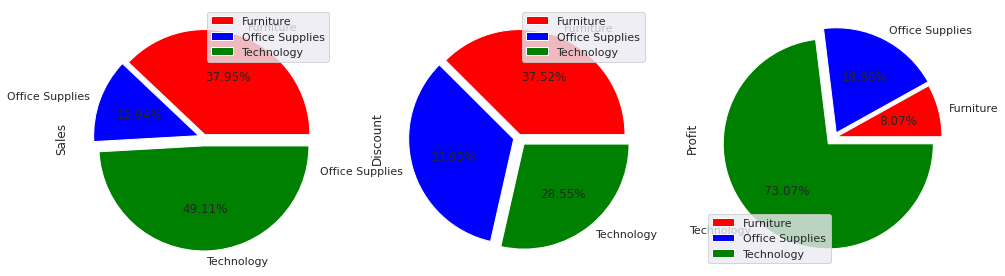

In [19]:
df_category=data.groupby(['Category'])[['Sales', 'Discount','Profit']].mean()
df_category.plot.pie(subplots=True,autopct="%1.2f%%",label=df_category.index,figsize=(16,7),explode=[0.03,0.05,0.08],colors=['red','blue','green','yellow'])

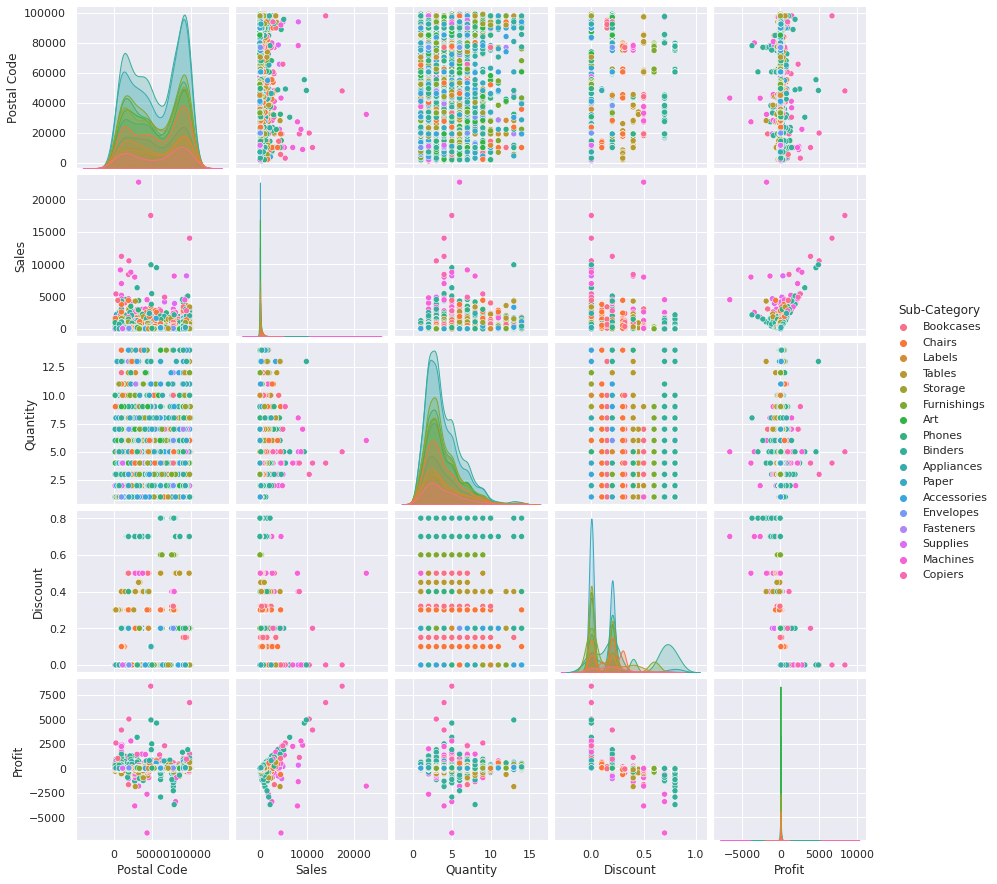

In [20]:
sns.pairplot(data,hue='Sub-Category')

/home/vinod/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Bookcases'),
  Text(1, 0, 'Chairs'),
  Text(2, 0, 'Labels'),
  Text(3, 0, 'Tables'),
  Text(4, 0, 'Storage'),
  Text(5, 0, 'Furnishings'),
  Text(6, 0, 'Art'),
  Text(7, 0, 'Phones'),
  Text(8, 0, 'Binders'),
  Text(9, 0, 'Appliances'),
  Text(10, 0, 'Paper'),
  Text(11, 0, 'Accessories'),
  Text(12, 0, 'Envelopes'),
  Text(13, 0, 'Fasteners'),
  Text(14, 0, 'Supplies'),
  Text(15, 0, 'Machines'),
  Text(16, 0, 'Copiers')])

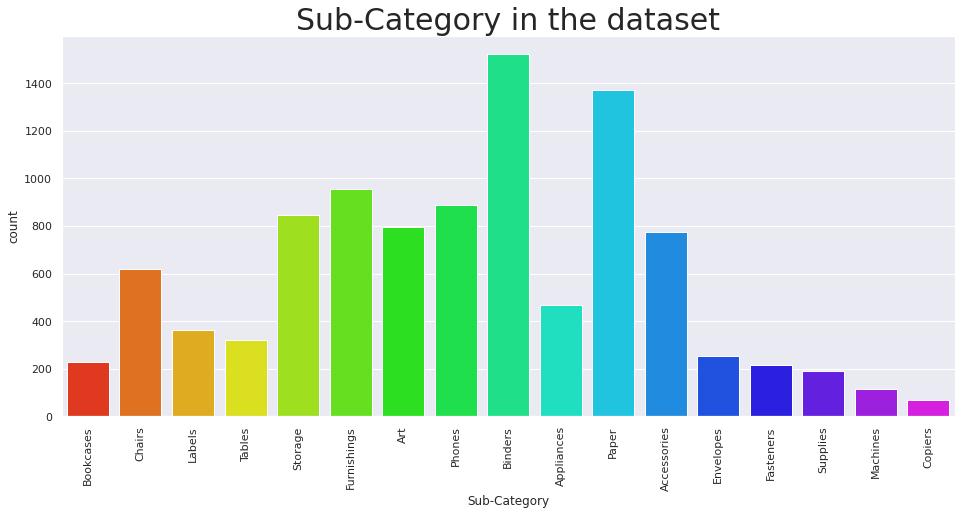

In [21]:
plt.figure(figsize=(16,7))
sns.countplot(data['Sub-Category'],palette='gist_rainbow')
plt.title("Sub-Category in the dataset",fontsize=30)
plt.xticks(rotation=90)

In [22]:
df_subcategory=data.groupby(['Sub-Category'])[['Sales', 'Discount','Profit']].mean()
df_subcategory.head()

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.068834,0.074874,8.200737
Binders,133.560560,0.372292,19.843574
Bookcases,503.859633,0.211140,-15.230509


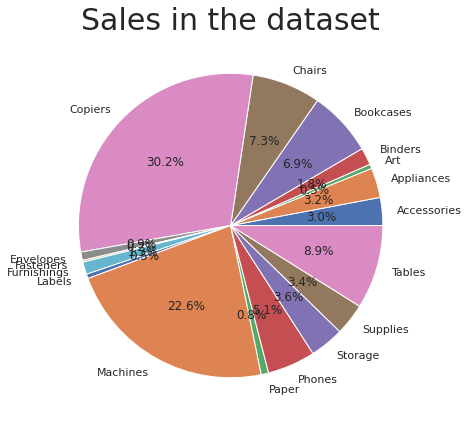

In [23]:
plt.figure(figsize=(16,7))
plt.pie(df_subcategory['Sales'],autopct='%1.1f%%',labels=df_subcategory.index)
plt.title("Sales in the dataset",fontsize=30)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Sub-Category'>

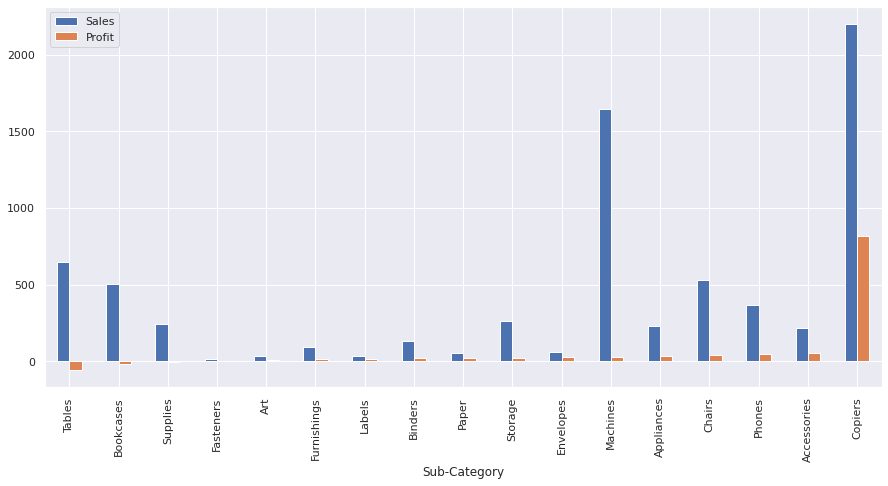

In [24]:
df_subcategory.sort_values('Profit')[['Sales','Profit']].plot(kind='bar',figsize=(15,7),label=['Avg Sales Price($)','Porit($)'])

/tmp/ipykernel_15036/1747122867.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby(['Sub-Category','Segment'])['Profit','Category'].count().reset_index().sort_values(by='Profit',ascending=False).plot(kind='bar',figsize=(15,7),color=['red','yellow'])


<AxesSubplot:>

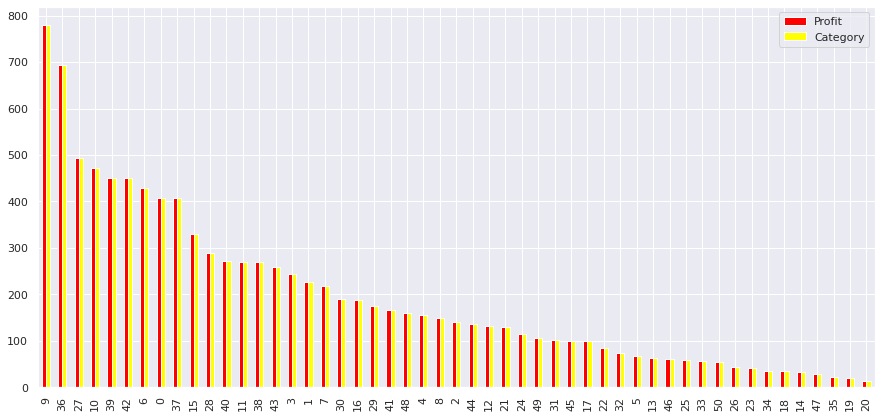

In [25]:
data.groupby(['Sub-Category','Segment'])['Profit','Category'].count().reset_index().sort_values(by='Profit',ascending=False).plot(kind='bar',figsize=(15,7),color=['red','yellow'])

In [26]:
#Label encoder 
label=LabelEncoder()
data['Ship Mode']=label.fit_transform(data['Ship Mode'])
data['Segment']=label.fit_transform(data['Segment'])
data['Country']=label.fit_transform(data['Country'])
data['City']=label.fit_transform(data['City'])
data['State']=label.fit_transform(data['State'])
data['Category']=label.fit_transform(data['Category'])
data['Region']=label.fit_transform(data['Region'])
data['Sub-Category']=label.fit_transform(data['Sub-Category'])

In [27]:
X=data.drop('Profit',axis=1)
y=data['Profit']

In [28]:
#Traning and testing 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=120)

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [30]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
#model buliding
def model_bulding(model,X_train,X_test,y_train,y_test):
    #fit the model to the train data
    model.fit(X_train,y_train)
    #Prediction 
    y_pred=model.predict(X_test)
    print("---------------------------------------------------------------")
    print("----------------------------------------------------------------")
    #Check the accuracy score
    print(f'the {model} test score is {model.score(X_test,y_test)*100:.2f}')
    print(f'the {model} train score is {model.score(X_train,y_train)*100:.2f}')
    print("-------------------------------------------------------------------")
    print("--------------------------------------------------------------------")
    #accuracy score
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    print("Root_mean_squred_error model {:.4f}".format(rmse))
    print("R2_score model {:4f}".format(r2_score(y_test,y_pred)))
    print("mean_absolute_error model {:4f}".format(mean_absolute_error(y_test,y_pred)))

# Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()
model_bulding(linear,X_train,X_test,y_train,y_test)

---------------------------------------------------------------
----------------------------------------------------------------
the LinearRegression() test score is 32.04
the LinearRegression() train score is 25.28
-------------------------------------------------------------------
--------------------------------------------------------------------
Root_mean_squred_error model 233.0880
R2_score model 0.320400
mean_absolute_error model 59.173349


# RandomForest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
random=RandomForestRegressor()
model_bulding(random,X_train,X_test,y_train,y_test)

---------------------------------------------------------------
----------------------------------------------------------------
the RandomForestRegressor() test score is 75.17
the RandomForestRegressor() train score is 95.71
-------------------------------------------------------------------
--------------------------------------------------------------------
Root_mean_squred_error model 140.8884
R2_score model 0.751707
mean_absolute_error model 23.255807


In [33]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
model_bulding(tree,X_train,X_test,y_train,y_test)

---------------------------------------------------------------
----------------------------------------------------------------
the DecisionTreeRegressor() test score is 69.26
the DecisionTreeRegressor() train score is 100.00
-------------------------------------------------------------------
--------------------------------------------------------------------
Root_mean_squred_error model 156.7693
R2_score model 0.692577
mean_absolute_error model 30.032599


In [34]:
#Install the XGBRegressor from the xgboost
from xgboost import XGBRegressor
#Install the XGBRegressor
xgb=XGBRegressor()
model_bulding(xgb,X_train,X_test,y_train,y_test)

/home/vinod/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:85: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


---------------------------------------------------------------
----------------------------------------------------------------
the XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method=None, validate_parameters=False, verbosity=None) test score is 65.80
the XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=0.300000012, max_delta_step=0, max_dept